# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [59]:
import pandas as pd
import numpy as np

In [60]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [61]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [62]:
diabetes["feature_names"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [63]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

* 10 variables :Attribute Information:
* Tenemos las features de nuestros pacientes, mientras que en la target tenemos la variable cuantitativa de diabetes
* 442 registros

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [64]:
# Show shape, size and ndim of 'data'
print(diabetes["data"].shape, diabetes["data"].size, diabetes["data"].ndim)

(442, 10) 4420 2


In [65]:
# Show shape, size and ndim of 'target'
print(diabetes["target"].shape, diabetes["target"].size, diabetes["target"].ndim)

(442,) 442 1


In [93]:
target = diabetes['target']

## Buliding a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [67]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [68]:
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [69]:
# Forma 1 a mano
diabetes["data"].shape


(442, 10)

In [94]:
# Forma 2 con train_test_split
# test_size = 422
# shuffle=False

from sklearn.model_selection import train_test_split
data_train,data_test,target_train,target_test = train_test_split(diabetes["data"], diabetes["target"], test_size=20, shuffle=False)

In [95]:
# Muestra el tamaño de data_train, data_test, target_train y target_test
print("data_train",data_train.shape)
print("data_test", data_test.shape)
print("target_test",target_test.shape)
print("target_train",target_train.shape)

data_train (422, 10)
data_test (20, 10)
target_test (20,)
target_train (422,)


In [96]:
# Pasar array a dataframe
df = pd.DataFrame(data_train)




df.columns = ["age","sex","bmi","bp","s1","s2","s3","s42","s5","s6"]
df.loc[:,"target"] = target_train
df


,age,sex,bmi,bp,s1,s2,s3,s42,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064,55.0
418,0.009016,-0.044642,-0.024529,-0.026328,0.098876,0.094196,0.070730,-0.002592,-0.021395,0.007207,84.0
419,-0.020045,-0.044642,-0.054707,-0.053870,-0.066239,-0.057367,0.011824,-0.039493,-0.074093,-0.005220,42.0
420,0.023546,-0.044642,-0.036385,0.000079,0.001183,0.034698,-0.043401,0.034309,-0.033246,0.061054,146.0


In [97]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s42,s5,s6,target
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,0.000390,-0.000143,0.000473,0.000318,-0.000532,-0.000540,-0.000508,0.000097,0.000164,-0.000469,153.362559
std,0.047856,0.047612,0.047645,0.047653,0.047512,0.047509,0.046904,0.047723,0.047998,0.047451,77.218534
min,-0.107226,-0.044642,-0.090275,-0.112399,-0.126781,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767,25.000000
25%,-0.034575,-0.044642,-0.033960,-0.035795,-0.034592,-0.030437,-0.036038,-0.039493,-0.033246,-0.033179,88.000000
50%,0.005383,-0.044642,-0.006745,-0.005670,-0.004321,-0.004915,-0.006584,-0.002592,-0.001496,-0.001078,141.500000
75%,0.038076,0.050680,0.032326,0.035644,0.026982,0.028200,0.026550,0.034309,0.032432,0.027917,214.000000
max,0.110727,0.050680,0.170555,0.132044,0.153914,0.198788,0.181179,0.185234,0.133597,0.135612,346.000000


In [98]:
from scipy import stats
from scipy.stats import skew, kurtosis

<Axes: ylabel='Count'>

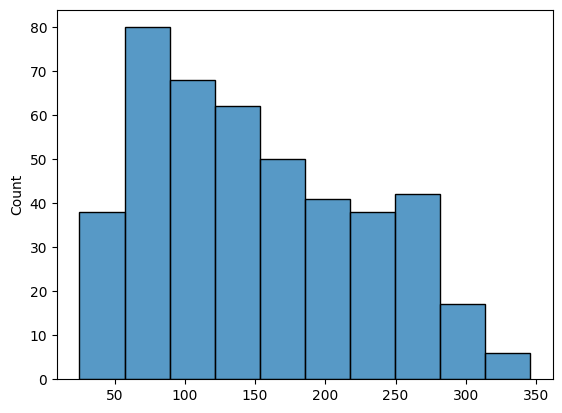

In [ ]:
import seaborn as sns
sns.histplot(target) #De esta manera podemos observar el skew y kurtosis

In [120]:
# Muestra skew y kurtosis con stats de scipy


print(skew(target))
print(kurtosis(target))


0.43906639932477265
-0.8866436055681386


In [100]:
# Genera un distplot de target
import seaborn as sns

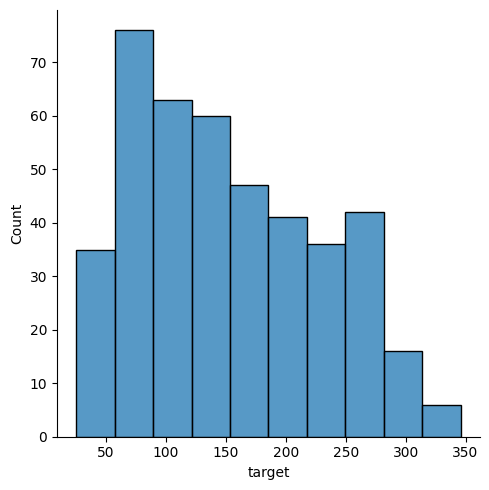

In [101]:
sns.displot(df.loc[:,"target"])

In [124]:
# Genera un heatmap
correlation = df.corr()
sns.heatmap(df,df
            )

TypeError: heatmap() takes 1 positional argument but 2 were given

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [125]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [126]:
diabetes_model.fit(data_train,target_train)

print(diabetes_model.coef_)
diabetes_model.intercept_

[   0.31 -237.64  510.54  327.73 -814.11  492.8   102.84  184.6   743.51
   76.1 ]


np.float64(152.76429169049118)

#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

y = a + bx1 + cx2...
7.43e+02 = 7.43*^10^2 = 743

In [104]:
# coefficient array

In [105]:
# Crea un df con el coeficiente de cada feature
coef_df = pd.DataFrame(diabetes_model.coef_)
coef_df = coef_df
coef_df.columns = ["coef"]

coef_df

,coef
0,0.306094
1,-237.635570
2,510.538048
3,327.729878
4,-814.111926
5,492.799595
6,102.841240
7,184.603496
8,743.509388
9,76.096646


In [106]:
# intercepto
diabetes_model.intercept_

np.float64(152.76429169049118)

In [107]:
# Crea una predicción con los datos de test y grábalos en la variable predictions
predictions = diabetes_model.predict(data_test)
predictions

array([197.61898486, 155.44031962, 172.88875144, 111.53270645,
       164.79397301, 131.06765869, 259.12441219, 100.47873746,
       117.06005372, 124.30261597, 218.36868146,  61.19581944,
       132.24837933, 120.33293546,  52.54513009, 194.03746764,
       102.5756431 , 123.56778709, 211.03465323,  52.60221696])

#### Print your `diabetes_target_test` and compare with the prediction. 

In [108]:
target_test
print(predictions)

[197.61898486 155.44031962 172.88875144 111.53270645 164.79397301
 131.06765869 259.12441219 100.47873746 117.06005372 124.30261597
 218.36868146  61.19581944 132.24837933 120.33293546  52.54513009
 194.03746764 102.5756431  123.56778709 211.03465323  52.60221696]


In [127]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error ,mean_squared_error, r2_score
print('MAE:', mean_absolute_error(target_test, predictions))
print('MSE:', mean_squared_error(target_test, predictions))
print('MAPE:', mean_absolute_percentage_error(target_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(target_test, predictions)))
print("r2",r2_score(target_test, predictions))

MAE: 36.60961865545879
MSE: 2004.5186863342092
MAPE: 0.3930876102873051
RMSE: 44.77185149548999
r2 0.585085427447195


#### Is `diabetes_target_test` exactly the same as the model prediction?

#### Which are the most important features?

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Repetimos el entrenamiento, esta vez estandarizando los datos

In [129]:
mms = MinMaxScaler()
mms.fit(data_train)
data_train_maxmin = mms.transform(data_train)

In [111]:
# Crea un df con el coeficiente de cada feature

In [112]:
# Crea una predicción con los datos de test y grábalos en la variable predictions_std
predictions_std = mms

In [113]:
# Muestra MAE, MAPE, MSE, RMSE

#### Iteramos con un nuevo modelo para comprobar si podemos mejorar el anterior

In [114]:
# Divide X e y, dropeando target y sex para el conjunto X


In [115]:
# train_test_split


In [116]:
# Entrena de nuevo el modelo y muestra MAE, MAPE, MSE, RMSE

In [117]:
# score